<a href="https://colab.research.google.com/github/zameerhossain/Image-forgery-detection-using-deep-learning/blob/master/CNN_Model_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget clone https://www.dropbox.com/s/iuv35g1bdgbj9g7/phase-01-training.tar.gz
#!wget clone https://www.dropbox.com/s/711qsc6u79f6dwr/phase-01-testing.tar.gz

--2019-12-31 12:25:49--  http://clone/
Resolving clone (clone)... failed: Name or service not known.
wget: unable to resolve host address ‘clone’
--2019-12-31 12:25:49--  https://www.dropbox.com/s/iuv35g1bdgbj9g7/phase-01-training.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/iuv35g1bdgbj9g7/phase-01-training.tar.gz [following]
--2019-12-31 12:25:49--  https://www.dropbox.com/s/raw/iuv35g1bdgbj9g7/phase-01-training.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucff1868184b71c80e1a9bb4aa29.dl.dropboxusercontent.com/cd/0/inline/AvSpTnOCi10K5RGrgwGfsOZthnfWRSCZ38KJpG0JedGBxHUyYP0KdKT1kLSlPtOjBVeQxXqXYtg0LiY9pf2Tg7loCgpidLts38SoGug6eL7WHg/file# [following]
--2019-12-31 12:25:49--  https://ucff1868184b71c80e1a

In [0]:
!apt-get install p7zip-full
!p7zip -d phase-01-training.tar.gz
!tar -xvf phase-01-training.tar.gz


#!apt-get install p7zip-full
#!p7zip -d phase-01-testing.tar.gz
#!tar -xvf phase-01-testing.tar.gz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/bin/p7zip: phase-01-training.tar.gz: unknown suffix
dataset-dist/
dataset-dist/phase-01/
dataset-dist/phase-01/training/
dataset-dist/phase-01/training/pristine/
dataset-dist/phase-01/training/pristine/2ab93ec08b4247332e2cee4379ad7e3c.png
dataset-dist/phase-01/training/pristine/0cd3336bcf6da64100be66bd613d493c.png
dataset-dist/phase-01/training/pristine/6f556b2583701fb343a5aca946dd71dd.png
dataset-dist/phase-01/training/pristine/4c15ec243178e6fea3390f17b1c0070c.png
dataset-dist/phase-01/training/pristine/0e53cd9ad8eeb7e42730e80624a3a0dc.png
dataset-dist/phase-01/training/pristine/5fb090a35bfa08776c41e854d6d274ca.png
dataset-dist/phase-0

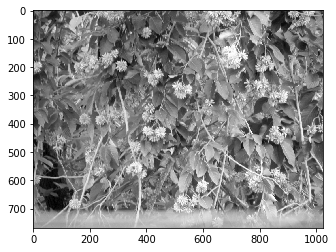

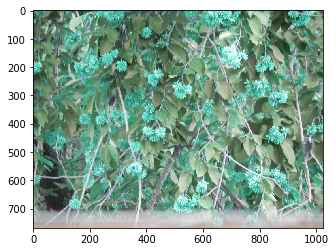

In [0]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
import random


from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator




DATADIR = "dataset-dist/phase-01/training"

CATEGORIES = ["pristine", "fake"]
for category in CATEGORIES:  #2 time for fake and pristine
    path = os.path.join(DATADIR,category)  # creat a path with pristine & fake
    for img in os.listdir(path):  #for every image fake orginal
        c=cv2.imread(os.path.join(path,img))
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array   
        #img_array = cv2.imread(os.path.join(path,img) ) 
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        plt.imshow(c)
        break  
    break  




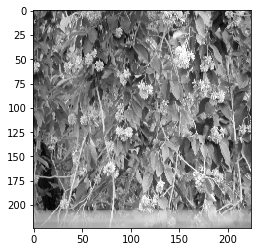

(768, 1024)
(224, 224)


In [0]:
IMG_SIZE =224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()
print(img_array.shape)
print(new_array.shape)

In [0]:
training_data = []


def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=pristine 1=fake

        for img in tqdm(os.listdir(path)):  # iterate over each image per pristine and fake
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                #img_array = cv2.imread(os.path.join(path,img) )
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))


100%|██████████| 901/901 [00:30<00:00, 29.60it/s]

1950


In [0]:
random.shuffle(training_data)   #shuffle data to solve overfitting
for sample in training_data[:1950]:
    print(sample[1])

1
1
0
1
1
0
1
0
0
0
1
0
0
1
0
0
0
1
1
1
0
0
1
0
1
0
0
1
0
1
1
1
1
0
1
0
0
0
1
1
0
0
1
1
0
0
0
1
1
1
1
1
0
1
1
0
1
0
0
0
0
1
0
1
1
1
1
1
0
1
0
0
0
0
1
0
0
0
0
1
1
1
0
1
0
1
1
0
0
1
1
1
0
0
0
0
1
0
0
0
0
1
0
0
1
0
1
1
1
0
1
1
1
1
0
0
1
1
1
1
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
1
0
1
0
0
1
0
1
0
0
0
0
0
1
1
0
1
0
0
0
1
1
0
1
1
1
0
0
1
0
1
1
0
1
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
0
1
0
0
0
0
0
0
1
0
0
1
0
0
1
1
1
0
0
0
1
0
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
1
1
1
1
1
1
1
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
1
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
1
0
0
0
1
1
0
0
0
0
0
1
0
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
1
0
0
1
0
0
1
0
1
1
1
0
0
1
0
0
1
1
1
1
1
1
0
0
0
0
1
0
1
1
1
1
0
0
0
0
0
1
0
1
1
1
0
0
1
0
1
1
1
0
1
0
0
0
0
1
1
1
0
0
1
1
0
0
1
1
1
1
0
1
1
0
0
1
1
0
0
1
1
1
0
1
1
1
0
0
1
1
1
0
0
1
0
1
1
1
1
0
0
1
1
0
0
1
1
0
1
1
1
1
0
0
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
0
0
1
0
0
1
1
0
1
0
1
0
1
1
1
0
1
0
0
1
0
1
1
1
0
0
0
0
0
0
1
0
1
1
1
1
1
0
1
0
1
0
1
1
0
1
0


In [0]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))


X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X, X_test, y, y_test = train_test_split(X, y, test_size=0.10)



In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)      #  .pickel  file creat kore
pickle_out.close()           

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")  #load
y = pickle.load(pickle_in)

In [0]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D ,BatchNormalization
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
from keras import regularizers



X = X/255.0
model = Sequential()

model.add(Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(0.001) , input_shape=X.shape[1:]))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(128, (3, 3),kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(512, (3, 3),kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dropout(0.5))
model.add(Dense(512,kernel_regularizer=regularizers.l2(0.001)))

model.add(Dropout(0.5))
model.add(Dense(512,kernel_regularizer=regularizers.l2(0.001)))

model.add(Dropout(0.5))
model.add(Dense(64,kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dense(1))

model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', 
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

history=model.fit(X, y, batch_size=12, epochs=100, validation_split=.3)



model.save('image_forgery')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 222, 222, 64)      640       
_________________________________________________________________
activation_28 (Activation)   (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 128)       73856     
_________________________________________________________________
activation_29 (Activation)   (None, 72, 72, 128)       0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 22, 22, 512)      

In [0]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print(C)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score 
model1=tf.keras.models.load_model("image_forgery")
X_test=X_test/255.0

y_pred=model1.predict(X_test)
print(y_test)
plot_confusion_matrix(y_test, y_pred.round())
print(y_test)
print (classification_report(y_test, y_pred.round()) )

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()